# Project notebook **<span style="COLOR:RED">Artemis</span>**


### Student 1 (first half presentation)
Name : Hamza Sentissi
<br>Group : intermediate
### Student 2 (second half presentation)
Name : Raphael Selignan
<br>Group : intermediate
### Data name : Expedia
### Data URL : 
### Short summary of the project and datasource :
<span style="COLOR:RED">Expedia kaggle challenge: we will try to predict if the person will book the reservation.</span>

# General instructions (this cell might be deleted for submission)
** <span style="color:red"> Write all the project in this file : code and explanations and upload it before January 7th at 23:55 </span> ** : 

<span style="color:red">Remember : Code cells must be smaller than 30 lines </span>

Every thing must be in the notebook :

* Explanation of what you want to do with data should be present in the Notebook
* Download data in the notebook (check the URL availability) and give the source of data (both URL and textual description)
* Give as much as possible characteristics of data (size, type, fields, ...)
* Provide visualisation of the data that you think useful
* Check for the consistence of the dataset (error, missing data,...) and correct and/or delete errors
* **Ask yourself a question that request you to perform an estimation** (for example, you can choose a data depending on time, and try to predict the latest 10% of data knowing the rest of data). **This will typically be solved through the proposal of a model and fitting the parameters of the model to (part of) the data.**

If you end up writing long chunks of code, make sure you split it in logical «smaller code cells» and explain the logic. The Juptyer Notebook will be **both the memoire** you will submit for evaluation **and the visual support** for your oral presentation of your project, keep this in mind while writing it.

### Aims : 
** <span style="color:red"> Here explain what you what to do with data</span> ** 
* The data is a dataset provided by Expedia concerning the navigation logs of its customers.
* The main objective we choose to consider was to see if there was any way of predicting whether a customer is browsing the website for information or if he is going to book an hotel on this visit.

### Download : 
** <span style="color:red">Write explanations here</span> ** 
* The dataframe is a kaggle dataframe. Due to login complexity on the kaggle website we will donwload it from a personnal Github.
* The original dataframe contains 20 + million lines. In order to keep a reasonable processing time during all our work we will only work on about 2 million lines for this exercise. 


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

C:\Users\hamza\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
url="https://raw.githubusercontent.com/Raphael-Selignan/Expedia/master/data.csv"
data=pd.read_csv(url, error_bad_lines = False)

url_test="https://raw.githubusercontent.com/Raphael-Selignan/Expedia/master/test.csv"
data_t=pd.read_csv(url_test, error_bad_lines = False)

### Data charaterisctics :  Here, give as much as possible characteristics of data
** <span style="color:red"> Write explanations here</span> ** 
* The dataset contains 23 columns representing 23 variables and about 100k individuals.
* Among the 23 columns, 16 are to be considered qualitative as they correspond to arbitrary indexing by Expedia. These are the following : site_name, posa_continent, user_location_country, user_location_region, user_location_city, user_id, is_mobile,is_package, channel_ID, srch_destination_id, srch_destination_type_id, hotel_continent, hotel_country, hotel_market, is_booking, hotel_cluster
* The 7 remaining columns are quantitative: date_time, srch_ci, srch_co, srch_adults_cnt, srch_children_cnt, srch_room_cnt, cnt


* Let's detail the content of the 16 qualitative column, that contain only integer type with various ranges:

- site_name : ID of the Expedia website receiving the search :from 1 to 53
- posa_continent : ID of the continent associated with the point of sales : from 0 to 4
- user_location_country : ID of the country where the customer is browsing : from 0 to 239
- user_location_region : ID of the region where the customer is browsing : from 0 to 1025
- user_location_city : ID of the city where the customer is browsing : from 3 to 56495
- user_id : ID assigned to the user by Expedia (generally dependant on the session or user account) : from 12 to 391 007
- is_mobile : boolean taking value 1 is the search is made on a mobile phone or tablet, 0 otherwise
- is_package : boolean taking value 1 if the search was a package (including a flight and the hotel) 0 otherwise
- channel : ID of the marketing channel (which adwords, which website brought the "prospect" to the Expedia website) : from 0 to 10
- srch_destination_ID : ID of the destination where the hotel is wanted : from 8 to 65035
- srch_destination_type_ID : arbitrary "type of" destination set by Expedia (such as "seaside", "historic") : from 1 to 9
- hotel_continent : ID of the continent of the hotel searches : from 0 to 6
- hotel_market : ID of the arbitrary market defined by Expedia : from 0 to 2117
- is_booking : boolean taking value 1 if the search ends with a booking, 0 otherwhise
- cnt : number of similar searches during a session by the same user : from 1 to 59
- hotel_cluster: ID of the arbitrary cluster number assigned by Expedia to the destination hotel : from 0 to 99


* Let's detail the content of the 7 quantitative columns

- date_time : timestamp corresponding to the date of the search : string
- srch_ci : timestamp of the checkin date : string
- srch_co : timestamp of the checkout date : string
- srch_adults_cnt : number of adults in the hotel room : integer from 0 to 9
- srch_children_cnt : number of children in extra occupancy for an hotel room : integer from 0 to 9
- srch_rm_cnt : number of hotel rooms searched for : integer from 1 to 8
- orig_destination_distance : distance between the customer and the hotel at the time of search : float from 0.005600 to 11641.2242 (0 would mean unable to compute) 

In [3]:
## Dataframe size
print(data.shape)
## Equivalent summary de la base de donnée
print(data.head())
data.describe()



(100000, 25)
   Unnamed: 0            date_time  site_name  posa_continent  \
0           0  2014-08-11 07:46:59          2               3   
1           1  2014-08-11 08:22:12          2               3   
2           2  2014-08-11 08:24:33          2               3   
3           3  2014-08-09 18:05:16          2               3   
4           4  2014-08-09 18:08:18          2               3   

   user_location_country  user_location_region  user_location_city  \
0                     66                   348               48862   
1                     66                   348               48862   
2                     66                   348               48862   
3                     66                   442               35390   
4                     66                   442               35390   

   orig_destination_distance  user_id  is_mobile      ...        \
0                  2234.2641       12          0      ...         
1                  2234.2641       12    

,Unnamed: 0,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,63078.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000
mean,49999.500000,9.10014,2.637850,84.531040,311.630930,28465.223540,1897.609161,195700.878390,0.138030,0.260470,...,0.325160,1.112700,14511.034340,2.590540,0.08270,1.477770,3.206530,80.972620,597.559610,49.74576
std,28867.657797,12.09091,0.751001,54.320574,209.399151,16822.922817,2123.885180,110173.879786,0.344933,0.438893,...,0.722341,0.441928,11043.082364,2.160456,0.27543,1.197163,1.624119,55.679861,507.624672,28.95063
min,0.000000,2.00000,0.000000,0.000000,0.000000,3.000000,0.005600,12.000000,0.000000,0.000000,...,0.000000,0.000000,8.000000,1.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.00000
25%,24999.750000,2.00000,3.000000,66.000000,174.000000,13914.000000,290.528875,107548.000000,0.000000,0.000000,...,0.000000,1.000000,8267.000000,1.000000,0.00000,1.000000,2.000000,50.000000,160.000000,25.00000
50%,49999.500000,2.00000,3.000000,66.000000,311.000000,27733.000000,1093.888450,181983.000000,0.000000,0.000000,...,0.000000,1.000000,11271.000000,1.000000,0.00000,1.000000,2.000000,50.000000,585.000000,49.00000
75%,74999.250000,11.00000,3.000000,69.000000,385.000000,43113.000000,2518.177400,301357.000000,0.000000,1.000000,...,0.000000,1.000000,18881.000000,5.000000,0.00000,2.000000,4.000000,106.000000,701.000000,73.00000
max,99999.000000,53.00000,4.000000,239.000000,1025.000000,56495.000000,11641.224200,391007.000000,1.000000,1.000000,...,9.000000,8.000000,65035.000000,9.000000,1.00000,59.000000,6.000000,212.000000,2117.000000,99.00000


### Data visualisation and representation
** <span style="color:red"> Hotels booked by geography </span> ** 
* This graph shows us the frequency of reservation for each continent. This allows us to spot the main markets of Expedia.

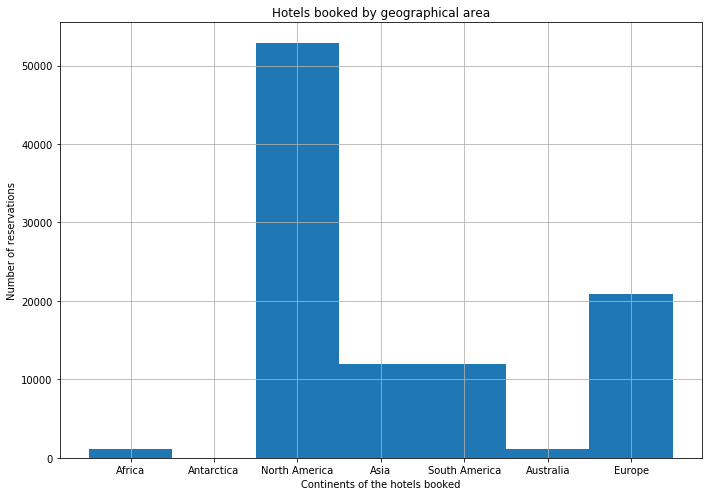

In [4]:
## Histogramm plot for Hotel bookings per continent
f = plt.figure(figsize =(10,7))

plt.hist(data['hotel_continent'], bins = np.arange(8)-0.5)
plt.xlabel('Continents of the hotels booked')
plt.ylabel('Number of reservations')
plt.title('Hotels booked by geographical area')
plt.xticks([0,1,2,3,4,5,6], ['Africa','Antarctica','North America','Asia','South America','Australia', 'Europe'])
plt.grid(True)
f.tight_layout()
plt.show()



The outpt of this chart shows the geographical repartition of the activities of Expedia. As a US-based website, it seems logical that its activity is mainly focused on North America, even though the website is expanding activities in Europe. The activity in Asia and South America are still laging behind due to local booking websites.

In [5]:
#Change the column name to id
data.rename(columns = {'Unnamed: 0':'id'}, inplace = True)
data.describe()

,id,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,63078.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000
mean,49999.500000,9.10014,2.637850,84.531040,311.630930,28465.223540,1897.609161,195700.878390,0.138030,0.260470,...,0.325160,1.112700,14511.034340,2.590540,0.08270,1.477770,3.206530,80.972620,597.559610,49.74576
std,28867.657797,12.09091,0.751001,54.320574,209.399151,16822.922817,2123.885180,110173.879786,0.344933,0.438893,...,0.722341,0.441928,11043.082364,2.160456,0.27543,1.197163,1.624119,55.679861,507.624672,28.95063
min,0.000000,2.00000,0.000000,0.000000,0.000000,3.000000,0.005600,12.000000,0.000000,0.000000,...,0.000000,0.000000,8.000000,1.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.00000
25%,24999.750000,2.00000,3.000000,66.000000,174.000000,13914.000000,290.528875,107548.000000,0.000000,0.000000,...,0.000000,1.000000,8267.000000,1.000000,0.00000,1.000000,2.000000,50.000000,160.000000,25.00000
50%,49999.500000,2.00000,3.000000,66.000000,311.000000,27733.000000,1093.888450,181983.000000,0.000000,0.000000,...,0.000000,1.000000,11271.000000,1.000000,0.00000,1.000000,2.000000,50.000000,585.000000,49.00000
75%,74999.250000,11.00000,3.000000,69.000000,385.000000,43113.000000,2518.177400,301357.000000,0.000000,1.000000,...,0.000000,1.000000,18881.000000,5.000000,0.00000,2.000000,4.000000,106.000000,701.000000,73.00000
max,99999.000000,53.00000,4.000000,239.000000,1025.000000,56495.000000,11641.224200,391007.000000,1.000000,1.000000,...,9.000000,8.000000,65035.000000,9.000000,1.00000,59.000000,6.000000,212.000000,2117.000000,99.00000


In [6]:
##Calculation of the average number of person per reservation

D_hotel = data.groupby(('hotel_continent')).apply(lambda x: np.average(x.srch_adults_cnt, weights=x.id))
print(D_hotel)
print(type(D_hotel))

D_hotel = D_hotel.tolist()
print(type(D_hotel))

## Issue: Continent 1 not in the list, so we have to create a new list as an index 'continent'
D_hotel.insert(1, '0')
print(type(D_hotel))
print(D_hotel)
continent = [0, 1, 2, 3, 4, 5, 6]

hotel_continent
0    2.017289
2    2.046772
3    2.033379
4    2.000083
5    2.010958
6    1.988273
dtype: float64
<class 'pandas.core.series.Series'>
<class 'list'>
<class 'list'>
[2.017288519412071, '0', 2.0467718265670967, 2.033378739727913, 2.0000833837241174, 2.0109583864840443, 1.9882733893455162]


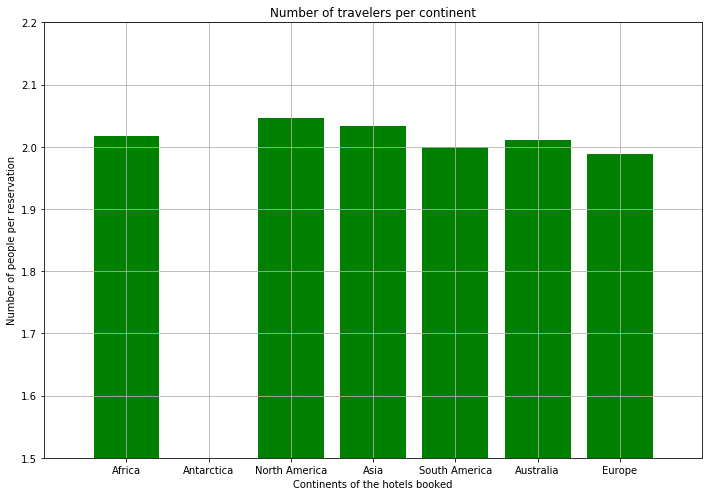

In [7]:
## Bar plot to show number of person per reservation per continetn
g = plt.figure(figsize =(10,7))

plt.bar(continent, D_hotel, color='green')
plt.xlabel('Continents of the hotels booked')
plt.ylabel('Number of people per reservation')
plt.title('Number of travelers per continent')
plt.xticks([0,1,2,3,4,5,6], ['Africa','Antarctica','North America','Asia','South America','Australia', 'Europe'])
plt.axis([-1, 7, 1.5, 2.2])
plt.grid(True)
g.tight_layout()
plt.show()

This graph shows the average number of person per reservation and per continent. The high number of lines taken into account (100k) has an "averaging effect", but the graph clearly shows differences in the habits of customers. For instance, the reservation in North America tend to have more people than in Europe: can that be explained by a cultural difference (travel with the whole family vs. travel in couple? 

In [8]:
## Adapt the time stamp to hour of purchase only (100K of train)
data['date_time'] = data['date_time'].str[11:13]
data.rename(columns = {'date_time':'Time'}, inplace = True)
print(data)

## Adapt the time stamp to hour of purchase only (1k of test)
data_t['date_time'] = data_t['date_time'].str[11:13]
data_t.rename(columns = {'date_time':'Time'}, inplace = True)
print(data_t)

          id Time  site_name  posa_continent  user_location_country  \
0          0   07          2               3                     66   
1          1   08          2               3                     66   
2          2   08          2               3                     66   
3          3   18          2               3                     66   
4          4   18          2               3                     66   
5          5   18          2               3                     66   
6          6   09          2               3                     66   
7          7   09          2               3                     66   
8          8   09          2               3                     66   
9          9   09          2               3                     66   
10        10   10          2               3                     66   
11        11   10          2               3                     66   
12        12   06          2               3                     66   
13    

In [9]:
## Calculation of purchase per hour / number of person per reservation (100k lines of train)
D_time = data.groupby(('Time')).apply(lambda x: np.average(x.srch_adults_cnt, weights=x.id))
print(D_time)
print(type(D_time))
D_time = D_time.tolist()
print(type(D_time))


## Calculation of purchase per hour / number of person per reservation (1k lines of test)
D_time_t = data_t.groupby(('Time')).apply(lambda x: np.average(x.srch_adults_cnt, weights=x.id))
print(D_time_t)
print(type(D_time_t))
D_time_t = D_time_t.tolist()
print(type(D_time_t))

## We have to create a new list as an index 'hour'
hour = list(range(0, 24))
print(hour)

Time
00    1.987487
01    2.017626
02    2.101458
03    2.098619
04    1.960686
05    2.039915
06    1.956025
07    1.979422
08    1.979050
09    2.045659
10    2.065071
11    2.028481
12    1.984774
13    1.998802
14    2.064544
15    2.066823
16    2.094028
17    2.037683
18    2.045665
19    2.074497
20    1.968103
21    2.014414
22    2.036884
23    1.941084
dtype: float64
<class 'pandas.core.series.Series'>
<class 'list'>
Time
00    1.929044
01    1.937073
02    1.975751
03    1.930920
04    1.910773
05    1.948421
06    1.906089
07    1.954224
08    1.898799
09    1.944733
10    1.883053
11    1.871930
12    2.002434
13    1.943947
14    1.954060
15    1.969638
16    1.931099
17    2.009399
18    2.003230
19    2.033183
20    2.022672
21    2.044226
22    1.993084
23    2.026236
dtype: float64
<class 'pandas.core.series.Series'>
<class 'list'>
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


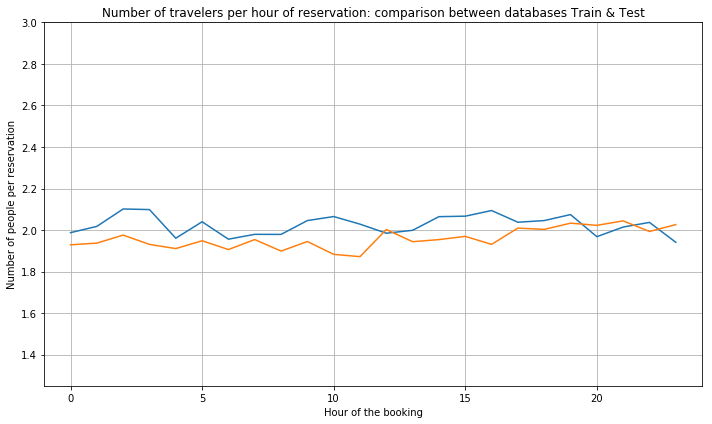

In [10]:
## Comparative plot to show number of person per reservation per hour of reservation between Train and Test databases
g = plt.figure(figsize =(10,6))
for frame in [D_time, D_time_t]:
    plt.plot(hour, frame)
plt.xlabel('Hour of the booking')
plt.ylabel('Number of people per reservation')
plt.title('Number of travelers per hour of reservation: comparison between databases Train & Test')

plt.axis([-1, 24, 1.25, 3])
plt.grid(True)
g.tight_layout()
plt.show()

This chart allows us to compare two databases: the train database (100k lines), which constitutes the whole data uploaded by expedia and an extract of this database Test (10k lines).

In this chart we are analyzing the number of person per reservation with the time of the booking: we expected to find differences with working hours (business trips reservation for one person).
The "averaging effect" affects the data here: the database with 100k is flatter whereas the Test database is more significant with decreases of the number of person per reservation at the expected working hours.

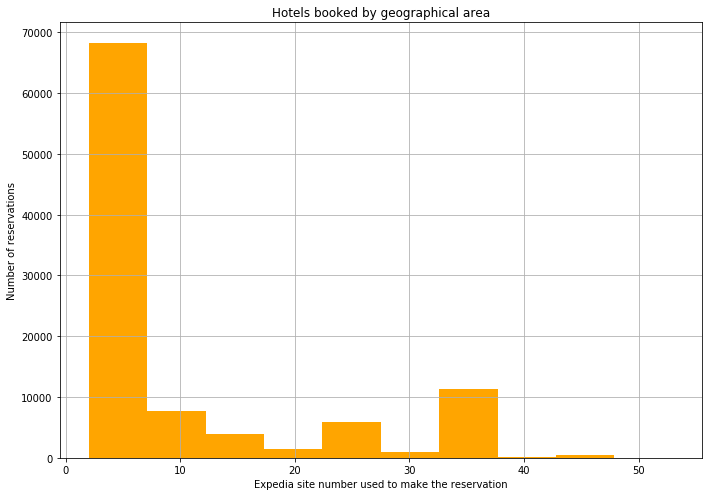

In [11]:
## Histogramm plot for Hotel bookings per site
f = plt.figure(figsize =(10,7))

plt.hist(data['site_name'], color='orange')
plt.xlabel('Expedia site number used to make the reservation')
plt.ylabel('Number of reservations')
plt.title('Hotels booked by geographical area')
plt.grid(True)
f.tight_layout()
plt.show()

This graph displays the number of hotel booked per site of Expedia. The Expedia websites are spread through the different geographies. Therefore, this graph also shows the overwhelming importance of the American local website of Expedia which concentrates more than 90% of the bookings.

In [12]:
## Calculation of number of reservation with mobile phone
D_mobile = data.groupby(('is_mobile')).apply(lambda x: np.sum(x.is_booking))
print(D_mobile)
print(type(D_mobile))
D_mobile = D_mobile.tolist()
print(type(D_mobile))
print(D_mobile)

## Creation of list index is_mobile
mobile = [0, 1]
print(mobile)

is_mobile
0    7506
1     764
dtype: int64
<class 'pandas.core.series.Series'>
<class 'list'>
[7506, 764]
[0, 1]


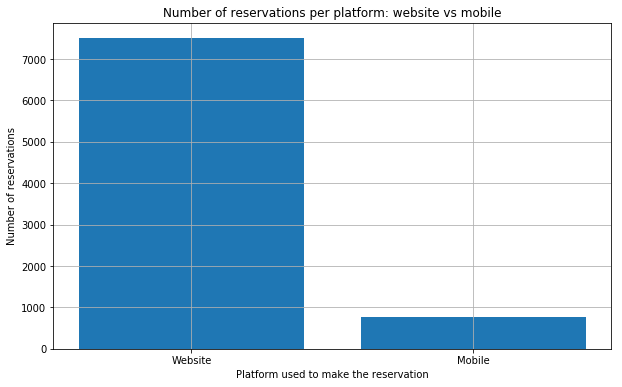

In [13]:
## Comparative plot to show number of reservation with or without mobile
h = plt.figure(figsize =(10,6))
plt.bar(mobile, D_mobile)
plt.xlabel('Platform used to make the reservation')
plt.ylabel('Number of reservations')
plt.title('Number of reservations per platform: website vs mobile')
plt.xticks([0,1], ['Website','Mobile'])
plt.grid(True)
g.tight_layout()
plt.show()

The graph here allows us to compare the actual number of booking done through website and mobile. We can see that more than 90% of the actual booking is done through the website, even if Expedia expects a rise in the reservations made through mobile.

### Data consistency checking
** <span style="color:red">Process </span> ** 
* Importing the data
* Checking for missing values
* Removing faulty rows/columns

In [14]:
#Re_importing the data
url="https://raw.githubusercontent.com/Raphael-Selignan/Expedia/master/data.csv"
data=pd.read_csv(url, error_bad_lines = False)

url_test="https://raw.githubusercontent.com/Raphael-Selignan/Expedia/master/test.csv"
data_t=pd.read_csv(url_test, error_bad_lines = False)

In [15]:
#checking for missing values
print(data.isnull().sum())
print(data_t.isnull().sum())



Unnamed: 0                       0
date_time                        0
site_name                        0
posa_continent                   0
user_location_country            0
user_location_region             0
user_location_city               0
orig_destination_distance    36922
user_id                          0
is_mobile                        0
is_package                       0
channel                          0
srch_ci                         71
srch_co                         71
srch_adults_cnt                  0
srch_children_cnt                0
srch_rm_cnt                      0
srch_destination_id              0
srch_destination_type_id         0
is_booking                       0
cnt                              0
hotel_continent                  0
hotel_country                    0
hotel_market                     0
hotel_cluster                    0
dtype: int64
Unnamed: 0                      0
id                              0
date_time                       0
site_name 

### Estimation question

* In order to implement the logistic regression on the dataset, we need to get rid of missing values
* Three columns are a problem : the origin_destination_distance and the check in time and check out time. 
* Most probably, the distance does not affect whether someone will book or not, we will remove the column. 
* The check in and check out date contain only 71 missing values, which is not significative out of 100 000 rows, so we will simply remove those 
* For simplicity reasons we will only keep columns containing is_package, is_booking, srch_adults_cnt, srch_children_cnt, srch_destination_type_id, cnt and is_mobile

In [16]:
#Removing the column
data.drop('orig_destination_distance',axis=1)
data.describe()

,Unnamed: 0,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,63078.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000
mean,49999.500000,9.10014,2.637850,84.531040,311.630930,28465.223540,1897.609161,195700.878390,0.138030,0.260470,...,0.325160,1.112700,14511.034340,2.590540,0.08270,1.477770,3.206530,80.972620,597.559610,49.74576
std,28867.657797,12.09091,0.751001,54.320574,209.399151,16822.922817,2123.885180,110173.879786,0.344933,0.438893,...,0.722341,0.441928,11043.082364,2.160456,0.27543,1.197163,1.624119,55.679861,507.624672,28.95063
min,0.000000,2.00000,0.000000,0.000000,0.000000,3.000000,0.005600,12.000000,0.000000,0.000000,...,0.000000,0.000000,8.000000,1.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.00000
25%,24999.750000,2.00000,3.000000,66.000000,174.000000,13914.000000,290.528875,107548.000000,0.000000,0.000000,...,0.000000,1.000000,8267.000000,1.000000,0.00000,1.000000,2.000000,50.000000,160.000000,25.00000
50%,49999.500000,2.00000,3.000000,66.000000,311.000000,27733.000000,1093.888450,181983.000000,0.000000,0.000000,...,0.000000,1.000000,11271.000000,1.000000,0.00000,1.000000,2.000000,50.000000,585.000000,49.00000
75%,74999.250000,11.00000,3.000000,69.000000,385.000000,43113.000000,2518.177400,301357.000000,0.000000,1.000000,...,0.000000,1.000000,18881.000000,5.000000,0.00000,2.000000,4.000000,106.000000,701.000000,73.00000
max,99999.000000,53.00000,4.000000,239.000000,1025.000000,56495.000000,11641.224200,391007.000000,1.000000,1.000000,...,9.000000,8.000000,65035.000000,9.000000,1.00000,59.000000,6.000000,212.000000,2117.000000,99.00000


In [17]:
columns = ['is_package', 'is_booking','srch_adults_cnt','srch_children_cnt','srch_destination_type_id','cnt','is_mobile']
data = data[columns]
#Selecting the columns

In [18]:
#Making dummy variables out of categorial data with more than two levels
categorical = ['srch_adults_cnt','srch_children_cnt','srch_destination_type_id','cnt']
for col in categorical : 
    col = pd.get_dummies(data[col],drop_first=True)
    #Replacing it within data
    data_dmy = data.drop(categorical, axis = 1)
    data_dmy = pd.concat([data_dmy,col], axis = 1)
print(data_dmy.head())
print(data_dmy.shape)

   is_package  is_booking  is_mobile  2  3  4  5  6  7  8 ...  21  22  23  24  \
0           1           0          0  0  1  0  0  0  0  0 ...   0   0   0   0   
1           1           1          0  0  0  0  0  0  0  0 ...   0   0   0   0   
2           0           0          0  0  0  0  0  0  0  0 ...   0   0   0   0   
3           0           0          0  0  0  0  0  0  0  0 ...   0   0   0   0   
4           0           0          0  0  0  0  0  0  0  0 ...   0   0   0   0   

   25  26  28  29  44  59  
0   0   0   0   0   0   0  
1   0   0   0   0   0   0  
2   0   0   0   0   0   0  
3   0   0   0   0   0   0  
4   0   0   0   0   0   0  

[5 rows x 32 columns]
(100000, 32)


In [19]:
#Deploying model
X = data.drop('is_booking',axis = 1)
y = data['is_booking']

X_data, X_test, y_data, y_test = train_test_split(X, y, test_size = .3, random_state=25)
logreg = LogisticRegression()
logreg.fit(X_data,y_data)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [22]:
y_pred = logreg.predict(X_test)

In [23]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[27571,     0],
       [ 2429,     0]], dtype=int64)

Hence, from the prediction that we built, we can conclude that the resulting output is heavily correlated to the variables we chose to build it on.